# 1. Problem Framing

Business application is that the company identified a lot of wastage in the business. To reduce this we are determining when extra staff are needed and when they are not needed.

In [2]:
from IPython.display import display
from IPython.display import Image

from sklearn.externals.six import StringIO 
from subprocess import call
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report 
from deslib.static.stacked import StackedClassifier
from sklearn.ensemble import VotingClassifier, BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import f1_score
from sklearn.preprocessing import Binarizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
import sklearn.linear_model as lm
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import plot_importance
from xgboost import XGBClassifier

# 2. Exploratory Data Analysis

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('H2.csv')

In [5]:
df.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0.0,...,No Deposit,6,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-03
1,1,88,2015,July,27,1,0,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-07-01
2,1,65,2015,July,27,1,0,4,1,0.0,...,No Deposit,9,NULL,0,Transient,68.0,0,1,Canceled,2015-04-30
3,1,92,2015,July,27,1,2,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,2,Canceled,2015-06-23
4,1,100,2015,July,27,2,0,2,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-04-02


## 2.1. Calculating Cost Function

In [6]:
import sklearn

In [7]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.22.1.


In [8]:
len(df)

79330

In [9]:
df.IsCanceled.value_counts()

0    46228
1    33102
Name: IsCanceled, dtype: int64

# 3. Preprocessing

In [10]:
# df.hist(bins=30, figsize=(16,16))
# plt.show()

In [11]:
len(df)

79330

In [12]:
df.isna().sum().sum()

28

In [13]:
df = df.dropna()

In [14]:
df.isna().sum().sum()

0

In [15]:
df.reset_index(drop=True, inplace=True)

In [16]:
len(df)

79302

In [17]:
# df.loc[df['Agent'] == '       NULL']

In [18]:
df.drop(columns=['ReservationStatusDate', 'ReservationStatus'], inplace=True)

In [19]:
len(df)

79302

In [20]:
y = df[['IsCanceled']]
X = df.drop(columns=['IsCanceled','ArrivalDateYear'])

In [21]:
num_features = ['LeadTime',
            'StaysInWeekendNights',
            'StaysInWeekNights',
            'Adults',
            'Children',
            'Babies',
            'PreviousCancellations',
            'PreviousBookingsNotCanceled',
            'BookingChanges',
            'DaysInWaitingList',
            'ADR',
            'RequiredCarParkingSpaces',
            'TotalOfSpecialRequests']

df_num = X[num_features]

df_cat = X.drop(columns=num_features)

cat_features = list(df_cat.columns)

In [22]:
len(X)

79302

In [23]:
len(y)

79302

In [24]:
X = pd.get_dummies(X, columns=cat_features, drop_first=True)

In [25]:
X.head()

,LeadTime,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,DaysInWaitingList,...,Company_ 486,Company_ 489,Company_ 491,Company_ 492,Company_ 494,Company_ 497,Company_ NULL,CustomerType_Group,CustomerType_Transient,CustomerType_Transient-Party
0,6,0,2,1,0.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,88,0,4,2,0.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,65,0,4,1,0.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,92,2,4,2,0.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,100,0,2,2,0.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [26]:
len(X)

79302

In [27]:
len(X)

79302

In [49]:
X_2 = X.drop(columns=num_features)

# 4. Modelling

## 4.0 Train-Test Split and Scaling

Logistic Regression must be scaled in advance, because the accuracy can be influenced.

In [50]:
X_2 = X.drop(columns=num_features)
scaler = StandardScaler()
X_s = pd.DataFrame(scaler.fit_transform(X[num_features]))
X_s.columns = num_features
X_s = pd.concat([X_s, X_2], axis=1)
X_s.head()


,LeadTime,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,DaysInWaitingList,...,Company_ 486,Company_ 489,Company_ 491,Company_ 492,Company_ 494,Company_ 497,Company_ NULL,CustomerType_Group,CustomerType_Transient,CustomerType_Transient-Party
0,-0.934996,-0.898710,-0.125608,-1.672123,-0.245542,-0.058611,-0.191969,-0.078183,-0.30792,-0.154635,...,0,0,0,0,0,0,1,0,1,0
1,-0.195941,-0.898710,1.247936,0.292478,-0.245542,-0.058611,-0.191969,-0.078183,-0.30792,-0.154635,...,0,0,0,0,0,0,1,0,1,0
2,-0.403237,-0.898710,1.247936,-1.672123,-0.245542,-0.058611,-0.191969,-0.078183,-0.30792,-0.154635,...,0,0,0,0,0,0,1,0,1,0
3,-0.159890,1.361231,1.247936,0.292478,-0.245542,-0.058611,-0.191969,-0.078183,-0.30792,-0.154635,...,0,0,0,0,0,0,1,0,1,0
4,-0.087787,-0.898710,-0.125608,0.292478,-0.245542,-0.058611,-0.191969,-0.078183,-0.30792,-0.154635,...,0,0,0,0,0,0,1,0,1,0


In [51]:
# Standardscaler() mean is 0, std is -+1.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, 
                                                                                y, 
                                                                                test_size=0.25, 
                                                                                random_state=50)

In [52]:
# To get 1) Confusion matrix, 2) accuracy, 3) precision and 4) recall
def get_clf_eval(y_test, pred):
    confusion =confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1Score = f1_score(y_test, pred)
    RocScore = roc_auc_score(y_test, pred)
    print('Confusion matrix')
    print(confusion)
    print('accuracy: {0:.4f},precison: {1:.4f}, recall: {2:.4f}, f1Score: {3:.4f}, RocScore: {0:.4f}'.format(accuracy, precision, recall, f1Score, RocScore))

# 4.1 Logistic Regession 
( L.Regression is very easy to use and it generally gived a good prediction)  
Evaluation 
1) Accuracy, 
2) Precision 
3) Recall 
4) F1_Score
5) Roc_Auc Score
6) Confusion Matrix

In [53]:
# Train and Predict using Logistic Regression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)
get_clf_eval(y_test, lr_preds)

Confusion matrix
[[9707 1826]
 [3384 4909]]
accuracy: 0.7372,precison: 0.7289, recall: 0.5919, f1Score: 0.6533, RocScore: 0.7372


In [54]:
params = {'penalty' : ['l2','l1'], 'C': [0.01,0.1,0.5,0.9]}
grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring = 'accuracy', cv =3)
grid_clf.fit(X_scaled, y)
print('Hyper-parameter:{0}, best acuracy:{1:3f}'.format(grid_clf.best_params_,grid_clf.best_score_))

Hyper-parameter:{'C': 0.01, 'penalty': 'l2'}, best acuracy:0.687234


<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

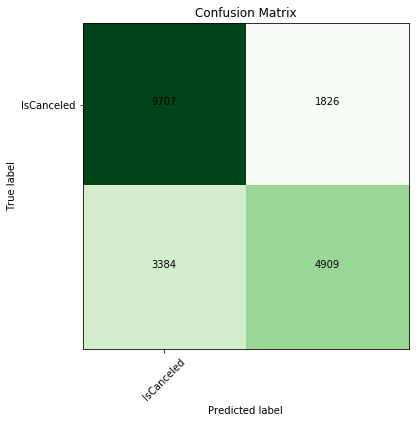

In [55]:
# CONFUSION MATRIX Visualisation  
cnf_matrix = confusion_matrix(y_test,lr_preds)
        
plt.figure(figsize=(6,6))
plt.imshow(cnf_matrix, cmap=plt.cm.Greens)
        
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

class_names = set(y)
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

thresh = cnf_matrix.max() / 2.
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, cnf_matrix[i, j],horizontalalignment='center')
plt.colorbar

In [56]:
def get_eval_by_threshold(y_test, pred_proba_c1,thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('threshold:', custom_threshold)
        get_clf_eval(y_test, custom_predict)


In [57]:
thresholds = [0.4,0.45,0.50,0.55,0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

threshold: 0.4
Confusion matrix
[[7899 3634]
 [1939 6354]]
accuracy: 0.7189,precison: 0.6362, recall: 0.7662, f1Score: 0.6951, RocScore: 0.7189
threshold: 0.45
Confusion matrix
[[8949 2584]
 [2685 5608]]
accuracy: 0.7342,precison: 0.6846, recall: 0.6762, f1Score: 0.6804, RocScore: 0.7342
threshold: 0.5
Confusion matrix
[[9707 1826]
 [3384 4909]]
accuracy: 0.7372,precison: 0.7289, recall: 0.5919, f1Score: 0.6533, RocScore: 0.7372
threshold: 0.55
Confusion matrix
[[10266  1267]
 [ 4050  4243]]
accuracy: 0.7318,precison: 0.7701, recall: 0.5116, f1Score: 0.6148, RocScore: 0.7318
threshold: 0.6
Confusion matrix
[[10720   813]
 [ 4710  3583]]
accuracy: 0.7214,precison: 0.8151, recall: 0.4321, f1Score: 0.5647, RocScore: 0.7214


# 4.2 DecisionTree

# 3. Ensemble Model 
1) Voting
2) XGBoost
3) Stacking

In [40]:
knn_clf = KNeighborsClassifier(n_neighbors =8)

In [41]:
#soft voting
vo_clf = VotingClassifier(estimators= [('LR', lr_clf),('KNN', knn_clf)], voting ='soft')

In [42]:
#VotingClassifier train/pred/Test
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting: {0:.4f}'.format(accuracy_score(y_test, pred)))

Voting: 0.8128


In [48]:
classifiers = [lr_clf,knn_clf]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred=classifier.predict(X_test)
    class_name=classifier.

AttributeError: 'LogisticRegression' object has no attribute '_class_'

## 4.3. Model Creation

In [ ]:
1. Logistic Regression
2. Nearest Neighbor
3. Support Vector Machines
4. Kernel SVM
5. Naïve Bayes
6. Decision Tree Algorithm
7. Random Forest Classification
8. Boost

In [ ]:
#Using Logistic Regression Algorithm to the Training Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)
#Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)
#Using SVC method of svm class to use Support Vector Machine Algorithm
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, Y_train)
#Using SVC method of svm class to use Kernel SVM Algorithm
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, Y_train)
#Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)
#Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

#Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm

from sklearn.ensemble import RandomForestbClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

# XGboost

In [60]:
dtrain = xgb.DMatrix(data=X_train, label = y_train)
dtest = xgb.DMatrix(data =X_test, label = y_test)

In [61]:
params = {'max_depth':3,
          'eta':0.1, 
          'objective':'binary:logistic',
          'eval_metric':'logloss',
          'early_stoppings':100}
num_rounds = 400

In [62]:
wlist = [(dtrain,'train'),(dtest,'test')]
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds,evals=wlist)

[14:02:55] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\learner.cc:328: 
Parameters: { early_stoppings } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.66891	test-logloss:0.66871
[1]	train-logloss:0.64904	test-logloss:0.64894
[2]	train-logloss:0.63162	test-logloss:0.63126
[3]	train-logloss:0.61709	test-logloss:0.61653
[4]	train-logloss:0.60449	test-logloss:0.60390
[5]	train-logloss:0.59373	test-logloss:0.59327
[6]	train-logloss:0.58455	test-logloss:0.58405
[7]	train-logloss:0.57659	test-logloss:0.57624
[8]	train-logloss:0.56971	test-logloss:0.56920
[9]	train-logloss:0.56298	test-logloss:0.56231
[10]	train-logloss:0.55756	test-logloss:0.55685
[11]	train-logloss:0.55231	test-logloss:0.55154
[12]	train-logloss:0.54774	test-logloss:0

[162]	train-logloss:0.46404	test-logloss:0.46352
[163]	train-logloss:0.46390	test-logloss:0.46339
[164]	train-logloss:0.46343	test-logloss:0.46298
[165]	train-logloss:0.46331	test-logloss:0.46287
[166]	train-logloss:0.46327	test-logloss:0.46287
[167]	train-logloss:0.46323	test-logloss:0.46286
[168]	train-logloss:0.46293	test-logloss:0.46255
[169]	train-logloss:0.46264	test-logloss:0.46226
[170]	train-logloss:0.46247	test-logloss:0.46207
[171]	train-logloss:0.46238	test-logloss:0.46196
[172]	train-logloss:0.46226	test-logloss:0.46184
[173]	train-logloss:0.46209	test-logloss:0.46170
[174]	train-logloss:0.46196	test-logloss:0.46160
[175]	train-logloss:0.46187	test-logloss:0.46153
[176]	train-logloss:0.46184	test-logloss:0.46152
[177]	train-logloss:0.46166	test-logloss:0.46134
[178]	train-logloss:0.46156	test-logloss:0.46127
[179]	train-logloss:0.46141	test-logloss:0.46113
[180]	train-logloss:0.46133	test-logloss:0.46109
[181]	train-logloss:0.46130	test-logloss:0.46109
[182]	train-logloss:

[330]	train-logloss:0.44420	test-logloss:0.44575
[331]	train-logloss:0.44411	test-logloss:0.44564
[332]	train-logloss:0.44398	test-logloss:0.44551
[333]	train-logloss:0.44384	test-logloss:0.44538
[334]	train-logloss:0.44380	test-logloss:0.44533
[335]	train-logloss:0.44361	test-logloss:0.44511
[336]	train-logloss:0.44346	test-logloss:0.44491
[337]	train-logloss:0.44332	test-logloss:0.44474
[338]	train-logloss:0.44319	test-logloss:0.44466
[339]	train-logloss:0.44316	test-logloss:0.44463
[340]	train-logloss:0.44292	test-logloss:0.44443
[341]	train-logloss:0.44267	test-logloss:0.44418
[342]	train-logloss:0.44232	test-logloss:0.44381
[343]	train-logloss:0.44220	test-logloss:0.44368
[344]	train-logloss:0.44209	test-logloss:0.44356
[345]	train-logloss:0.44192	test-logloss:0.44335
[346]	train-logloss:0.44184	test-logloss:0.44329
[347]	train-logloss:0.44179	test-logloss:0.44324
[348]	train-logloss:0.44169	test-logloss:0.44313
[349]	train-logloss:0.44166	test-logloss:0.44311
[350]	train-logloss:

In [64]:
pred_probs = xgb_model.predict(dtest)
print(np.round(pred_probs[:10],3))

[0.389 0.037 0.163 0.141 0.106 0.264 0.127 0.106 0.451 0.611]


In [66]:
preds = [ 1 if x > 0.5 else 0 for x in pred_probs]
print('prediction 10 :', preds [:10])

prediction 10 : [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


In [67]:
get_clf_eval(y_test, preds)

Confusion matrix
[[10039  1494]
 [ 2556  5737]]
accuracy: 0.7957,precison: 0.7934, recall: 0.6918, f1Score: 0.7391, RocScore: 0.7957


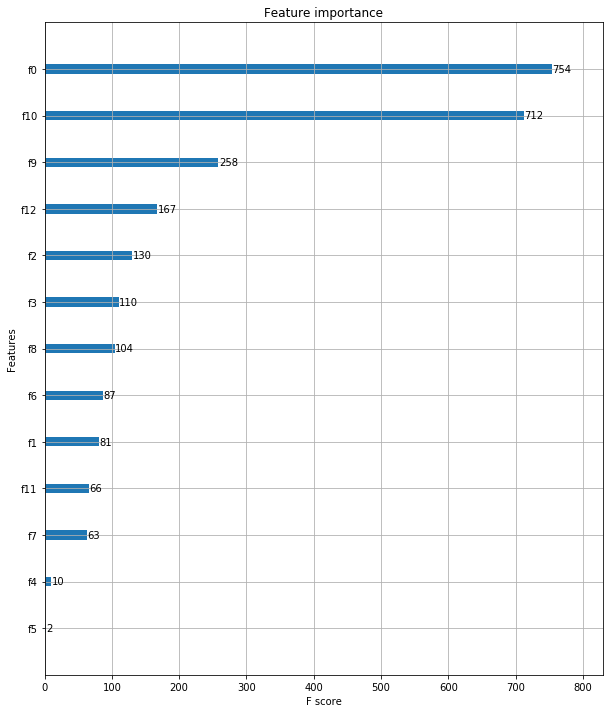

In [68]:
#Visualise Importance features
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_model, ax=ax)


In [73]:
X_s.head()

,LeadTime,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,DaysInWaitingList,...,Company_ 486,Company_ 489,Company_ 491,Company_ 492,Company_ 494,Company_ 497,Company_ NULL,CustomerType_Group,CustomerType_Transient,CustomerType_Transient-Party
0,-0.934996,-0.898710,-0.125608,-1.672123,-0.245542,-0.058611,-0.191969,-0.078183,-0.30792,-0.154635,...,0,0,0,0,0,0,1,0,1,0
1,-0.195941,-0.898710,1.247936,0.292478,-0.245542,-0.058611,-0.191969,-0.078183,-0.30792,-0.154635,...,0,0,0,0,0,0,1,0,1,0
2,-0.403237,-0.898710,1.247936,-1.672123,-0.245542,-0.058611,-0.191969,-0.078183,-0.30792,-0.154635,...,0,0,0,0,0,0,1,0,1,0
3,-0.159890,1.361231,1.247936,0.292478,-0.245542,-0.058611,-0.191969,-0.078183,-0.30792,-0.154635,...,0,0,0,0,0,0,1,0,1,0
4,-0.087787,-0.898710,-0.125608,0.292478,-0.245542,-0.058611,-0.191969,-0.078183,-0.30792,-0.154635,...,0,0,0,0,0,0,1,0,1,0


In [ ]:
f(0)= Leadtime, 
f(10)= 
f(9)= Daysinwaitinglist
f(12)=

# XGBoost

In [83]:
xgb_clf = XGBClassifier(n_estimators = 300, random_state = 50)

In [95]:
# Evaluation method = Roc Auc, 100 to finish
xgb_clf.fit(X_train, y_train, early_stopping_rounds = 100,
            eval_metric="auc", eval_set = [(X_train, y_train),(X_test, y_test)])
xgb_roc_Score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:4f}'.format(xgb_roc_Score))

[0]	validation_0-auc:0.81644	validation_1-auc:0.81766
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.82462	validation_1-auc:0.82691
[2]	validation_0-auc:0.82891	validation_1-auc:0.83127
[3]	validation_0-auc:0.83210	validation_1-auc:0.83478
[4]	validation_0-auc:0.83391	validation_1-auc:0.83622
[5]	validation_0-auc:0.83554	validation_1-auc:0.83733
[6]	validation_0-auc:0.83674	validation_1-auc:0.83846
[7]	validation_0-auc:0.83775	validation_1-auc:0.83938
[8]	validation_0-auc:0.84053	validation_1-auc:0.84211
[9]	validation_0-auc:0.84093	validation_1-auc:0.84265
[10]	validation_0-auc:0.84282	validation_1-auc:0.84471
[11]	validation_0-auc:0.84512	validation_1-auc:0.84689
[12]	validation_0-auc:0.84693	validation_1-auc:0.84823
[13]	validation_0-auc:0.84768	validation_1-auc:0.84845
[14]	validation_0-auc:0.84979	validation_1-auc:0.84966
[15]	validation_0-auc:0.850

[146]	validation_0-auc:0.92142	validation_1-auc:0.89153
[147]	validation_0-auc:0.92144	validation_1-auc:0.89155
[148]	validation_0-auc:0.92151	validation_1-auc:0.89159
[149]	validation_0-auc:0.92160	validation_1-auc:0.89161
[150]	validation_0-auc:0.92164	validation_1-auc:0.89161
[151]	validation_0-auc:0.92168	validation_1-auc:0.89159
[152]	validation_0-auc:0.92200	validation_1-auc:0.89164
[153]	validation_0-auc:0.92215	validation_1-auc:0.89172
[154]	validation_0-auc:0.92218	validation_1-auc:0.89170
[155]	validation_0-auc:0.92218	validation_1-auc:0.89173
[156]	validation_0-auc:0.92265	validation_1-auc:0.89176
[157]	validation_0-auc:0.92271	validation_1-auc:0.89172
[158]	validation_0-auc:0.92278	validation_1-auc:0.89170
[159]	validation_0-auc:0.92282	validation_1-auc:0.89167
[160]	validation_0-auc:0.92313	validation_1-auc:0.89157
[161]	validation_0-auc:0.92322	validation_1-auc:0.89154
[162]	validation_0-auc:0.92355	validation_1-auc:0.89168
[163]	validation_0-auc:0.92369	validation_1-auc:

[293]	validation_0-auc:0.94362	validation_1-auc:0.89829
[294]	validation_0-auc:0.94370	validation_1-auc:0.89836
[295]	validation_0-auc:0.94376	validation_1-auc:0.89838
[296]	validation_0-auc:0.94379	validation_1-auc:0.89842
[297]	validation_0-auc:0.94383	validation_1-auc:0.89840
[298]	validation_0-auc:0.94384	validation_1-auc:0.89841
[299]	validation_0-auc:0.94385	validation_1-auc:0.89841
ROC AUC: 0.898416


We obtained the figure of 0.898416 (ROC AUC). 
XGBoost can overcome the Problem of Overfitting, as a result, there is a high possibility to increase the final figure, we have decided to stop in here, because takes a long time to run the test 

# Stacking

In [86]:
# List of ML MODELS

knn_clf = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators=100)

# Final model
lr_final = LogisticRegression(C=10)

In [87]:
# Train with List of MLs
knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=None)

In [88]:
# Test MLs
knn_pred = knn_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test)

In [91]:
print('KNN :',accuracy_score(y_test,knn_pred))
print('Random Forest :',accuracy_score(y_test,rf_pred))
print('Decision Tree :',accuracy_score(y_test,dt_pred))
print('Adaboost :',accuracy_score(y_test,ada_pred))

KNN : 0.8096439019469384
Random Forest : 0.8338040956319984
Decision Tree : 0.8018258852012509
Adaboost : 0.7649551094522344


In [92]:
# Put those in Rogistic Regression
pred = np.array([knn_pred, rf_pred, dt_pred, ada_pred])
print(pred.shape)

pred = np.transpose(pred)
print(pred.shape)

(4, 19826)
(19826, 4)


In [94]:
# Apply it to pre-made Logistic Regression
lr_final.fit(pred, y_test)
final = lr_final.predict(pred)

print("Final model :" , accuracy_score(y_test, final))

Final model : 0.8356703318874206
